In [3]:
import numpy as np
import pandas as pd

In [4]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2021_10_25_bike/train.csv', parse_dates = ['datetime'])
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2021_10_25_bike/test.csv', parse_dates = ['datetime'])
sub = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2021_10_25_bike/sampleSubmission.csv')

In [5]:
new_tr = train.copy() # 데이터 백업
new_test = test.copy()
new_tr.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [6]:
## 더미변수, 파생변수 생성
new_tr['year'] = new_tr['datetime'].dt.year
new_tr.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011


In [7]:
new_tr['month'] = new_tr['datetime'].dt.month
new_tr['day'] = new_tr['datetime'].dt.day
new_tr['hour'] = new_tr['datetime'].dt.hour
new_tr['minute'] = new_tr['datetime'].dt.minute
new_tr['second'] = new_tr['datetime'].dt.second
new_tr['dayofweek'] = new_tr['datetime'].dt.dayofweek
new_tr.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5


In [13]:
import matplotlib.pyplot as plt ## seaborn 보다 고급 시각화 가능. but 코드 복잡
import seaborn as sns

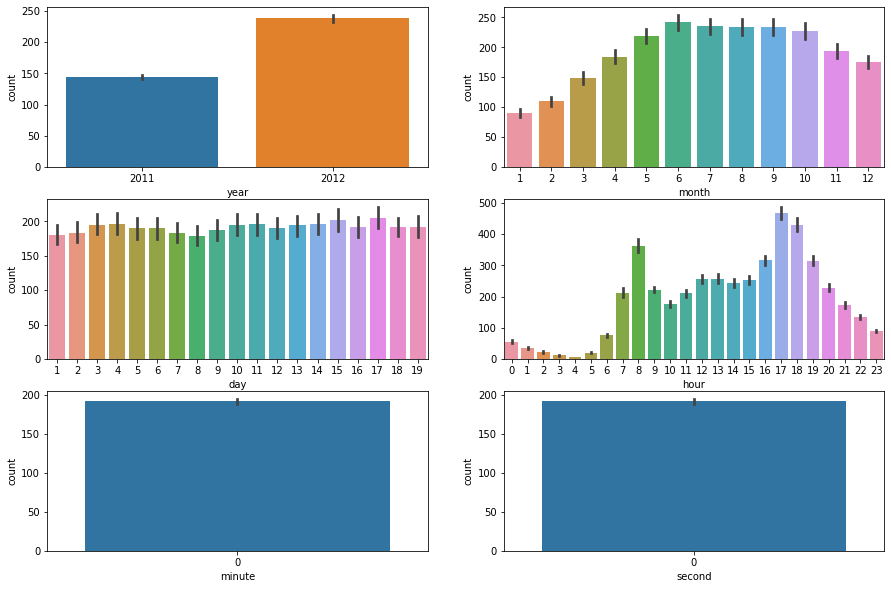

In [14]:
datetime_names = ['year', 'month', 'day', 'hour', 'minute', 'second']
i=0
plt.figure(figsize=(15,10))
for name in datetime_names:
  i = i + 1
  plt.subplot(3,2,i)
  sns.barplot(x=name, y='count', data=new_tr)
plt.show()

In [16]:
new_test['year']= new_test['datetime'].dt.year

new_test['month']= new_test['datetime'].dt.month

new_test['day']= new_test['datetime'].dt.day

new_test['dayofweek']= new_test['datetime'].dt.dayofweek
new_test['hour']= new_test['datetime'].dt.hour
new_test['minute']= new_test['datetime'].dt.minute

new_test['second']= new_test['datetime'].dt.second

In [17]:
print(new_test.shape)
new_test[["datetime", "year", "month", "day", "hour", "minute", "second", "dayofweek"]].head()

(6493, 16)


,datetime,year,month,day,hour,minute,second,dayofweek
0,2011-01-20 00:00:00,2011,1,20,0,0,0,3
1,2011-01-20 01:00:00,2011,1,20,1,0,0,3
2,2011-01-20 02:00:00,2011,1,20,2,0,0,3
3,2011-01-20 03:00:00,2011,1,20,3,0,0,3
4,2011-01-20 04:00:00,2011,1,20,4,0,0,3


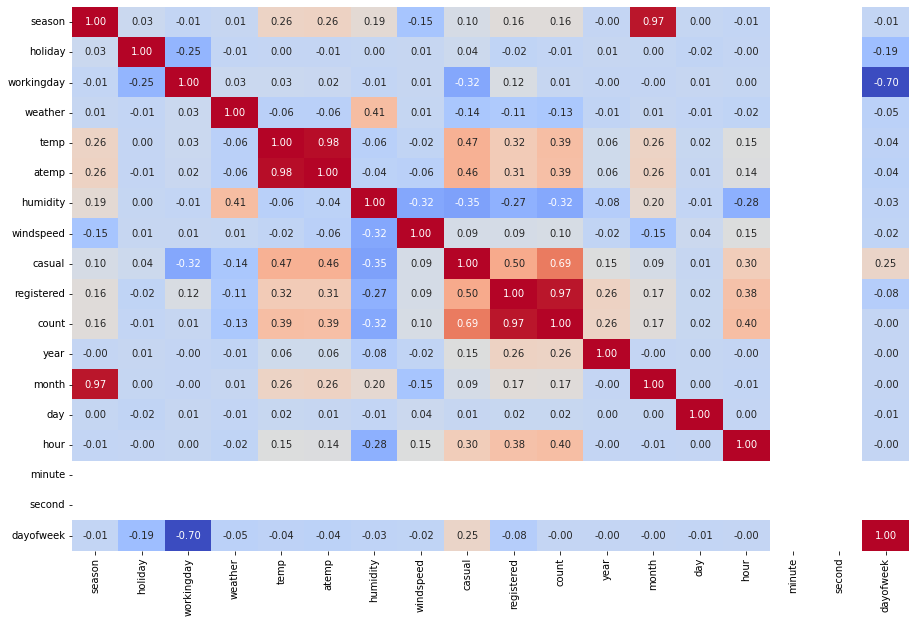

In [18]:
plt.figure(figsize=(15,10))
g = sns.heatmap(new_tr.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=False)

In [19]:
feature_names = [ 'season', 'holiday', 'workingday', 'weather',
'temp', 'atemp', 'humidity', 'windspeed',
"year", "hour", "dayofweek"] # 공통 변수
X_tr_all = new_tr[feature_names] # 학습용 데이터 변수 선택
X_test_all = new_test[feature_names] # 테스트 데이터의 변수 선택
print(X_tr_all.head())

   season  holiday  workingday  weather  ...  windspeed  year  hour  dayofweek
0       1        0           0        1  ...        0.0  2011     0          5
1       1        0           0        1  ...        0.0  2011     1          5
2       1        0           0        1  ...        0.0  2011     2          5
3       1        0           0        1  ...        0.0  2011     3          5
4       1        0           0        1  ...        0.0  2011     4          5

[5 rows x 11 columns]


In [20]:
label_name = 'count' # 렌탈 대수 (종속변수)
y_tr_all = new_tr[label_name] # 렌탈 대수 변수 값 선택

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_tr_all,
y_tr_all,
test_size=0.3,
random_state=77)

In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression() # 모델 객체 생성.
model.fit(X_train, y_train)
# 정확도 확인
print("학습용 세트 정확도: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(model.score(X_test, y_test)))

학습용 세트 정확도: 0.391
테스트 세트 정확도: 0.377


In [24]:
from sklearn.ensemble import RandomForestRegressor # 앙상블(의사결정트리 확장판)
seed = 37
model = RandomForestRegressor(n_jobs=-1, random_state=seed) # 모델 객체 생성.
model.fit(X_train, y_train) # 모델 학습(공부가 되었다.)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=37, verbose=0, warm_start=False)

In [25]:
pred = model.predict(X_test_all) # 예측
sub['count'] = pred
sub.loc[sub['count'] < 0, 'count'] = 0
sub.head(3)

,datetime,count
0,2011-01-20 00:00:00,11.75
1,2011-01-20 01:00:00,4.20
2,2011-01-20 02:00:00,4.78
